In [68]:
import imageio
from pathlib import Path
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import math, random

In [112]:
image1_dir=Path('../DAT210x/Module4/Datasets/ALOI/32/')
image2_dir=Path('../DAT210x/Module4/Datasets/ALOI/32i/')

In [38]:
x=image_dir.glob('png')

In [33]:
x

<generator object Path.glob at 0x10e1f3570>

In [29]:
img = imageio.imread('../DAT210x/Module4/Datasets/ALOI/32/32_r0.png')

In [119]:
def read_images(dir, color, imagelist, colorlist):
    for fname in dir.glob('*'):
        img=imageio.imread(fname)
        img=img[::2,::2]
        img=img.reshape(-1)
        imagelist.append(img)
        colorlist.append(color)
    return imagelist, colorlist

In [126]:
imagelist=[]
colorlist=[]
imagelist, colorlist=read_images(image1_dir, 'b', imagelist, colorlist)
imagelist, colorlist=read_images(image2_dir, 'r', imagelist, colorlist)

In [133]:
df=pd.DataFrame(imagelist)

In [134]:
from sklearn import manifold
iso=manifold.Isomap(n_neighbors=6, n_components=3)
iso.fit(df)
manifold = iso.transform(df)
manifold.shape

(84, 3)

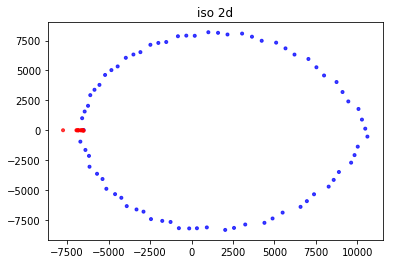

In [135]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_title('iso 2d')
ax.scatter(manifold[:,0], manifold[:,1],c=colorlist, marker='.', alpha=.75)

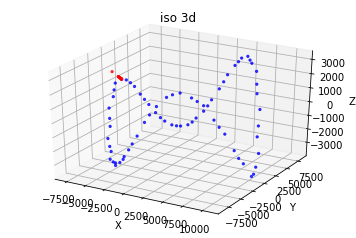

In [136]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_title('iso 3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(manifold[:,0], manifold[:,1], manifold[:,2], c=colorlist, marker='.', alpha=.75)